In [1]:
import glob

# Willow Fox Fortino's modules
import GPRutils
import vK2KGPR
import plotGPR
import vonkarmanFT as vk
import DESutils


# Science modules
import numpy as np
import astropy.units as u

import warnings
warnings.filterwarnings("ignore")

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
exps = DESutils.findExpNums()

Exposure: 348819
Band: z
Angle Averaged 2pt Correlation Function of Residual Field
--All pairs with separations less than 0.02 degrees included in calculation.
--All stars included according to maxDESErr and minDESErr
    keyword arguments, as well as all stars that make it through
    the first round of sigma clipping in the load method.
xi = 83.141 mas2 ± 0.793 mas2 mas^2

Kernel Parameters from 2d Correlation Fitting
K Variance     Outer Scale    Diameter       Wind X         Wind Y         
109.156556     1.5349095      -0.0061141     0.0890528      -0.0355237     

Kernel Parameters from GPR Optimization
K Variance     Outer Scale    Diameter       Wind X         Wind Y         
0.5527234      4.8941413      -0.0053758     -0.0141582     0.0191455      

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 81.662 ± 1.659 mas^2
xif: 30.913 ± 0.885 mas^2
Reduction: 2.642



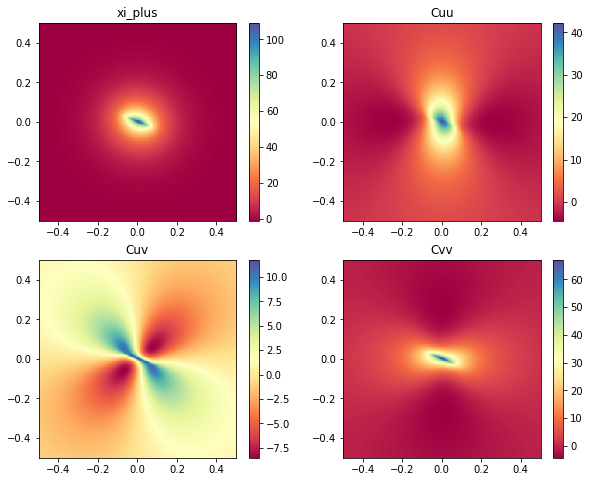

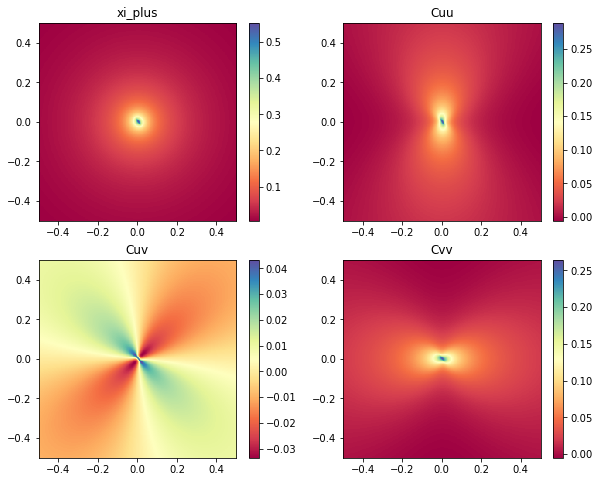

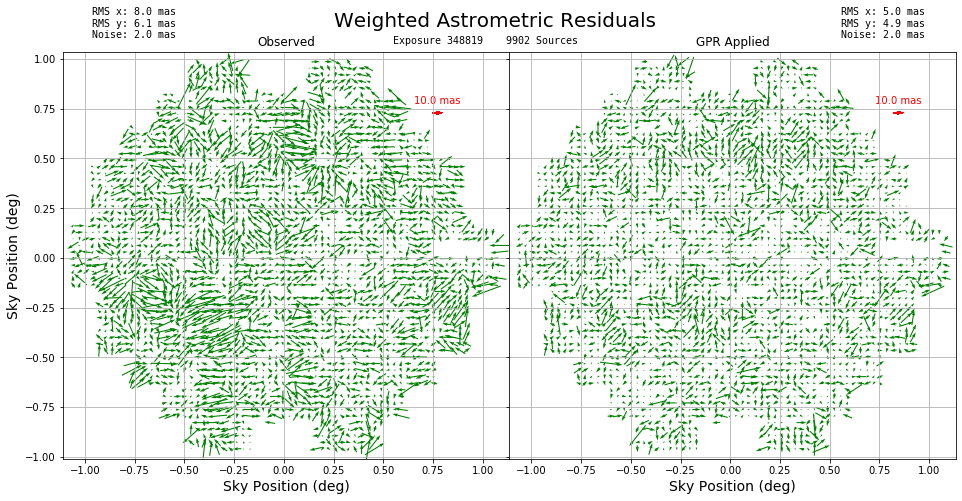

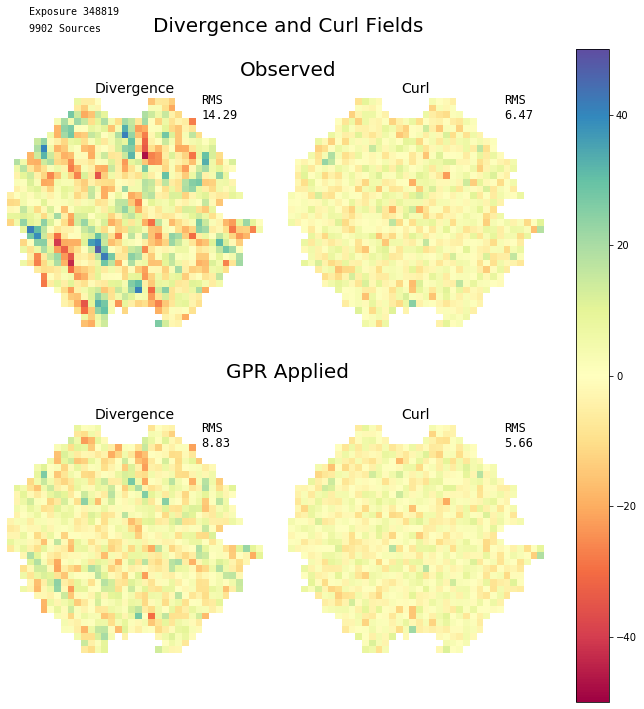

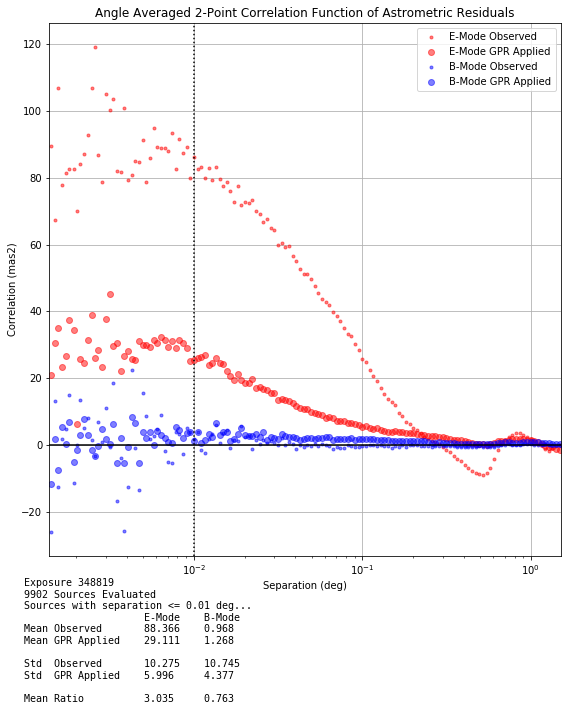

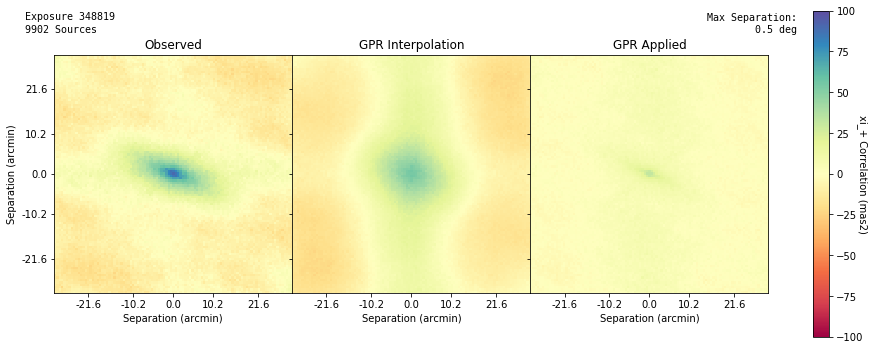

In [3]:
exp = exps[0]
dC = GPRutils.loadFITS(f"/home/austinfortino/DESworkspace/test_N/DESGP{exp}.fits")
dC.summarize()

Exposure: 348819
Band: z
Angle Averaged 2pt Correlation Function of Residual Field
--All pairs with separations less than 0.02 degrees included in calculation.
--All stars included according to maxDESErr and minDESErr
    keyword arguments, as well as all stars that make it through
    the first round of sigma clipping in the load method.
xi = 83.141 mas2 ± 0.793 mas2 mas^2

Kernel Parameters from 2d Correlation Fitting
K Variance     Outer Scale    Diameter       Wind X         Wind Y         
109.1565559    1.5349095      -0.0061141     0.0890528      -0.0355237     

Kernel Parameters from GPR Optimization
K Variance     Outer Scale    Diameter       Wind X         Wind Y         
37.5949952     0.4011336      -0.0100474     0.004916       0.062032       

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 82.612 ± 1.7 mas^2
xif: 18.578 ± 0.71 mas^2
Reduction: 4.447



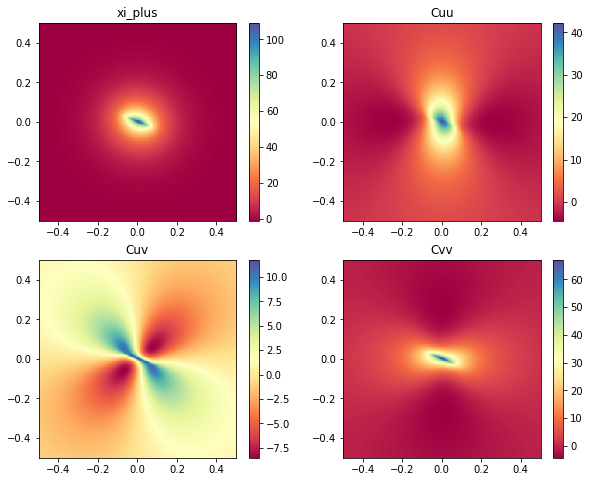

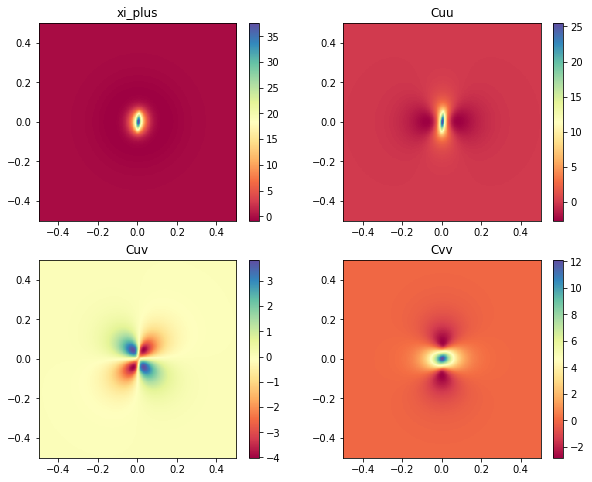

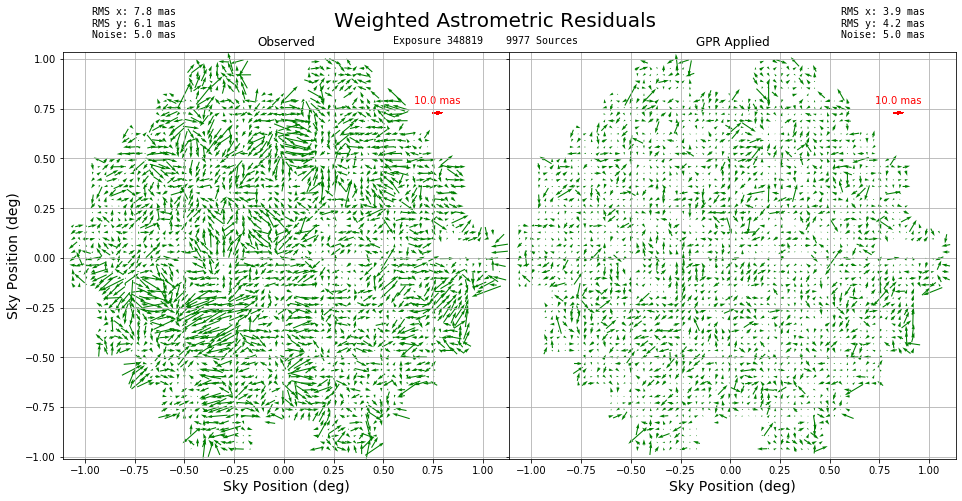

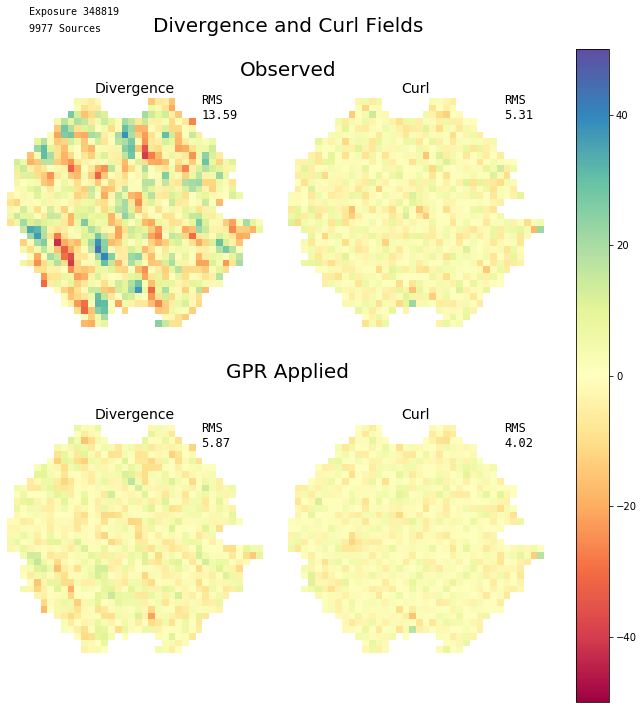

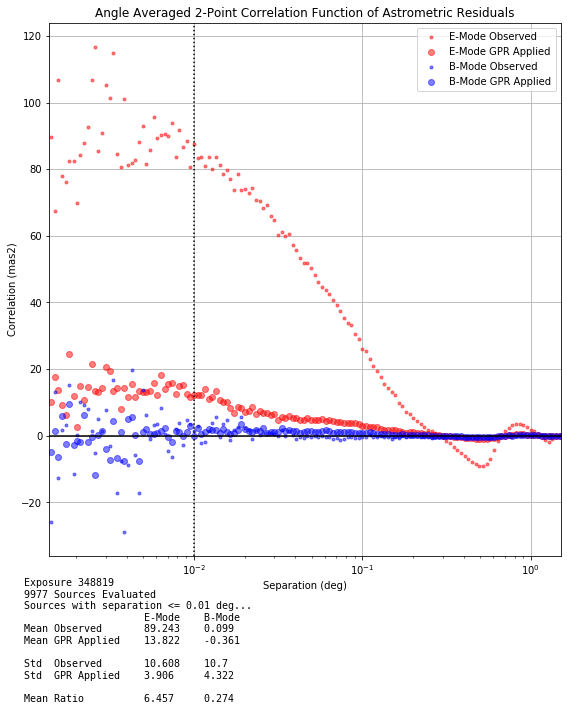

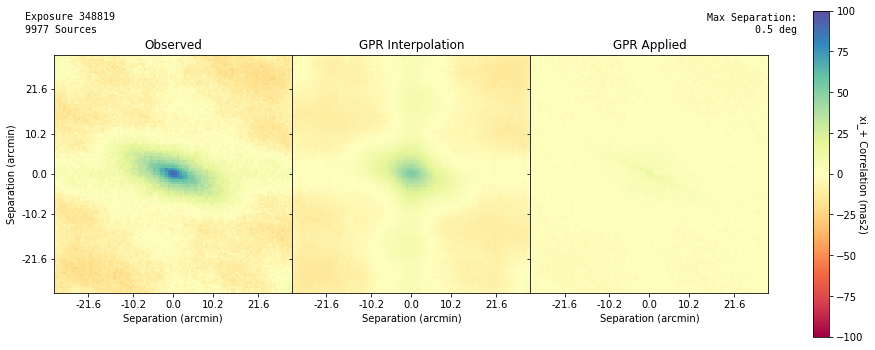

In [4]:
exp = exps[0]
dC = GPRutils.loadFITS(f"/home/austinfortino/DESworkspace/test_R/DESGP{exp}.fits")
dC.summarize()

Exposure: 348819
Band: z
Angle Averaged 2pt Correlation Function of Residual Field
--All pairs with separations less than 0.02 degrees included in calculation.
--All stars included according to maxDESErr and minDESErr
    keyword arguments, as well as all stars that make it through
    the first round of sigma clipping in the load method.
xi = 83.141 mas2 ± 0.793 mas2 mas^2

Kernel Parameters from 2d Correlation Fitting
K Variance     Outer Scale    Diameter       Wind X         Wind Y         
109.1565559    1.5349095      -0.0061141     0.0890528      -0.0355237     

Kernel Parameters from GPR Optimization
K Variance     Outer Scale    Diameter       Wind X         Wind Y         
285.2868807    0.1368895      -0.0201572     0.112512       -0.0311803     

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 83.216 ± 1.695 mas^2
xif: 8.799 ± 0.614 mas^2
Reduction: 9.457



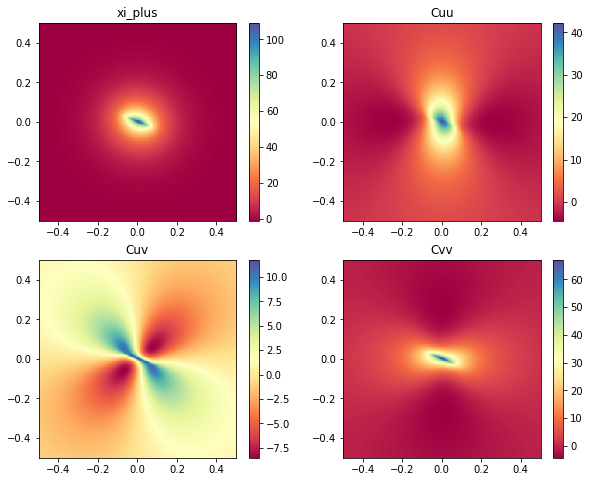

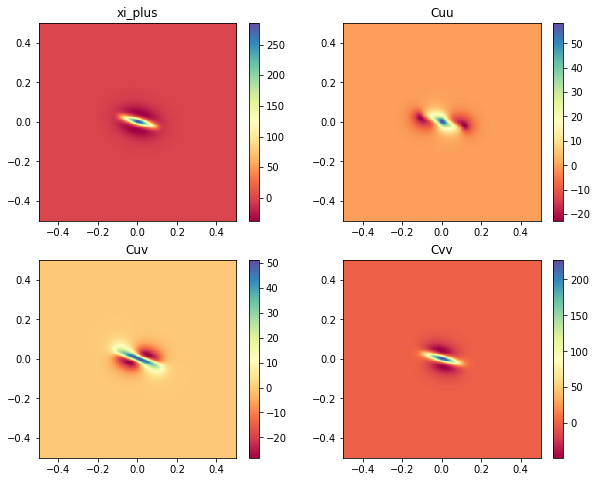

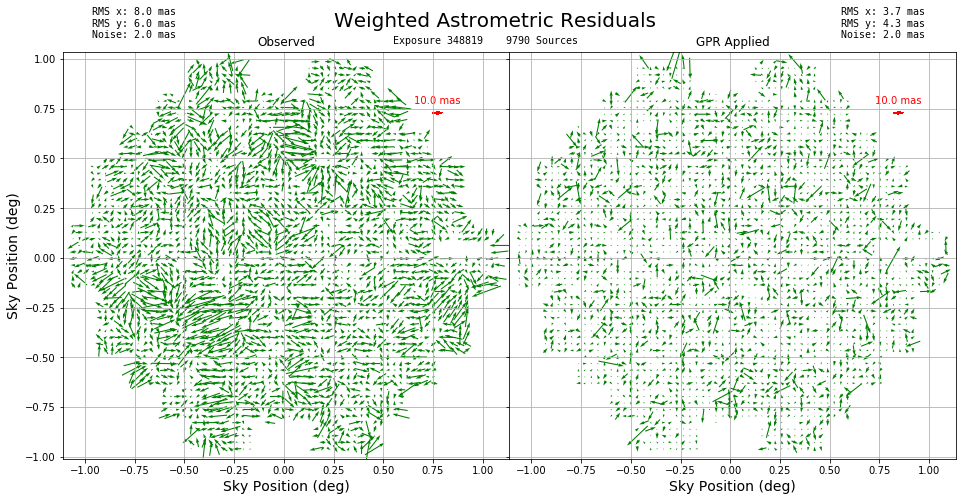

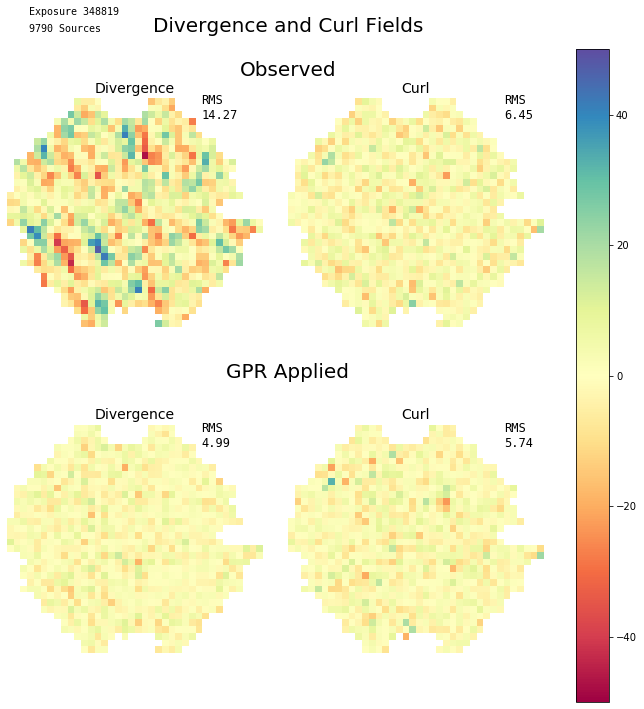

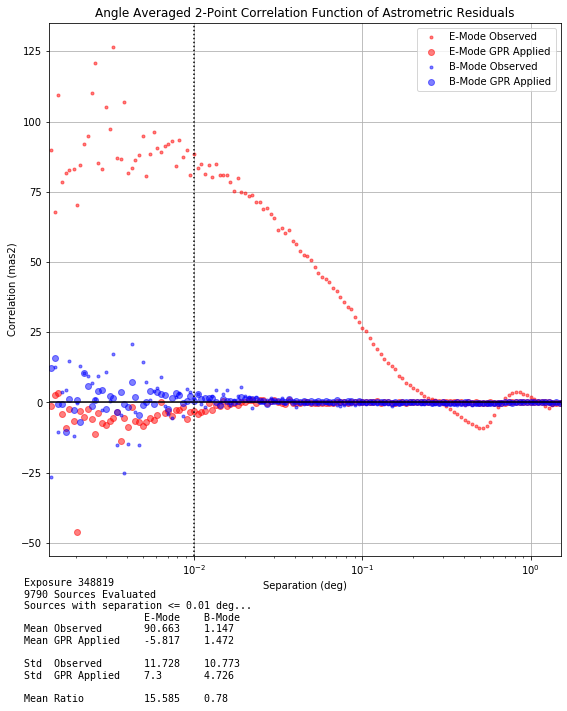

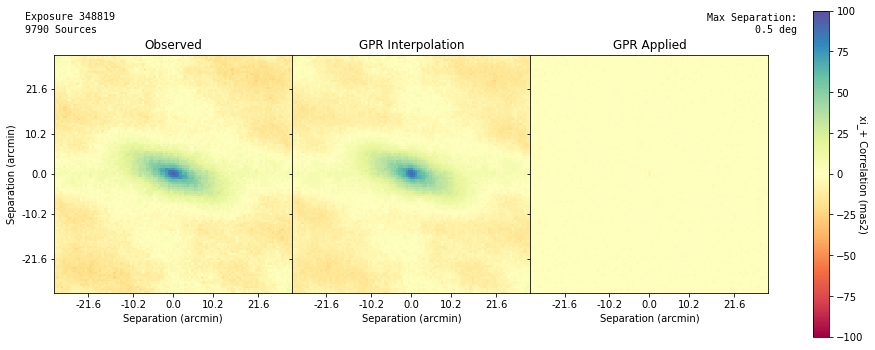

In [5]:
exp = exps[0]
dC = GPRutils.loadFITS(f"/home/austinfortino/DESworkspace/test_C/DESGP{exp}.fits")
dC.summarize()

Exposure: 348819
Band: z
Angle Averaged 2pt Correlation Function of Residual Field
--All pairs with separations less than 0.02 degrees included in calculation.
--All stars included according to maxDESErr and minDESErr
    keyword arguments, as well as all stars that make it through
    the first round of sigma clipping in the load method.
xi = 83.141 mas2 ± 0.793 mas2 mas^2

Kernel Parameters from 2d Correlation Fitting
K Variance     Outer Scale    Diameter       Wind X         Wind Y         
109.1565559    1.5349095      -0.0061141     0.0890528      -0.0355237     

Kernel Parameters from GPR Optimization
K Variance     Outer Scale    Diameter       Wind X         Wind Y         
319.5250679    1.1699662      -0.0159891     -0.0006549     0.0143467      

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 83.035 ± 1.692 mas^2
xif: 5.605 ± 0.484 mas^2
Reduction: 14.814



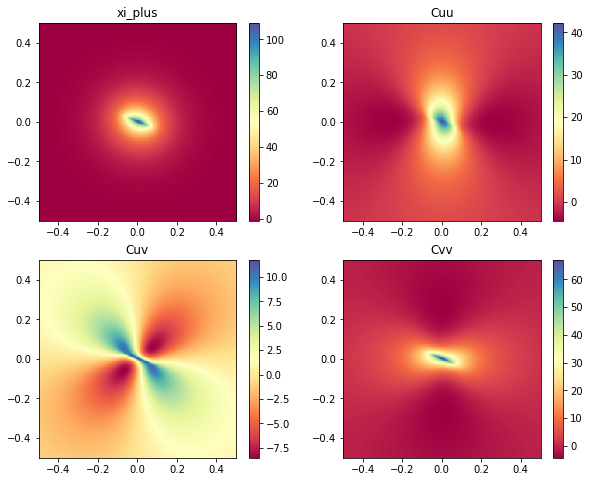

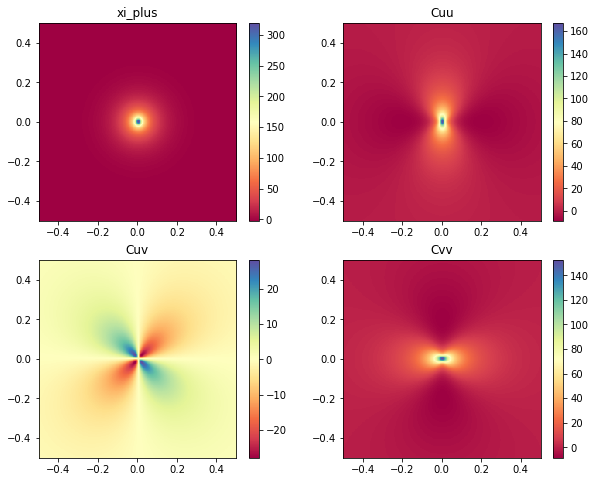

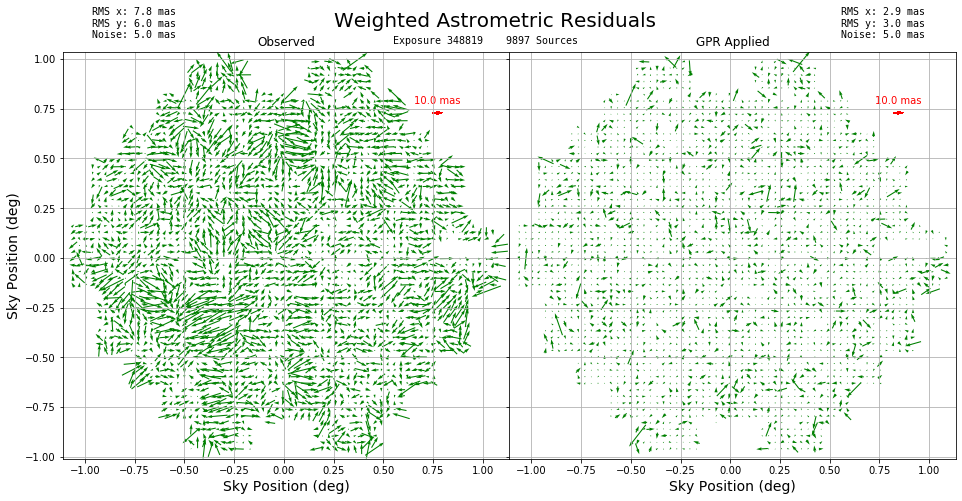

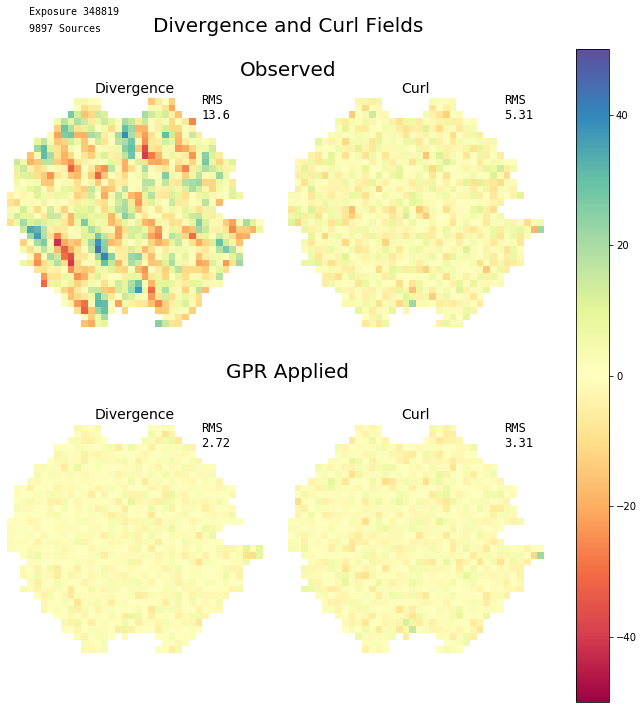

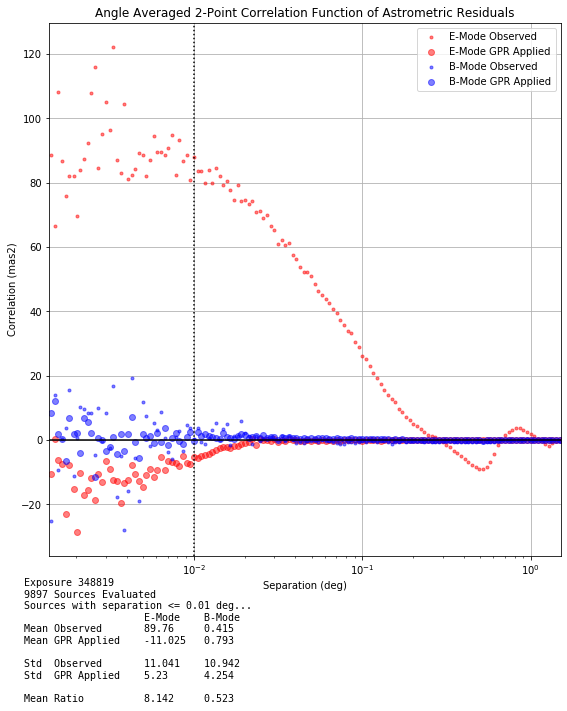

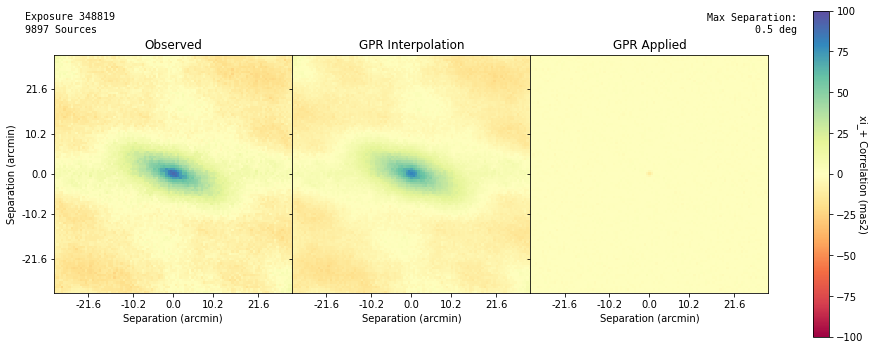

In [6]:
exp = exps[0]
dC = GPRutils.loadFITS(f"/home/austinfortino/DESworkspace/test_RC/DESGP{exp}.fits")
dC.summarize()